In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv("../artifacts/raw/train.csv")
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN34579,1,0,0,1,Meal Plan 1,0,Room_Type 1,0,2017,9,17,Complementary,0,0,0,0.0,0,Not_Canceled
1,INN14268,1,0,1,0,Not Selected,0,Room_Type 5,3,2018,9,26,Online,0,0,0,195.0,0,Not_Canceled
2,INN00810,1,0,1,1,Meal Plan 1,0,Room_Type 1,0,2018,1,2,Online,0,0,0,86.0,0,Not_Canceled
3,INN32373,2,0,1,2,Meal Plan 1,0,Room_Type 1,5,2017,10,19,Offline,0,0,0,90.0,0,Not_Canceled
4,INN12805,2,0,2,5,Meal Plan 1,0,Room_Type 1,247,2018,9,26,Online,0,0,0,100.3,1,Canceled


In [4]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [5]:
df.drop(columns=['Booking_ID'], inplace=True)
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1,0,0,1,Meal Plan 1,0,Room_Type 1,0,2017,9,17,Complementary,0,0,0,0.0,0,Not_Canceled
1,1,0,1,0,Not Selected,0,Room_Type 5,3,2018,9,26,Online,0,0,0,195.0,0,Not_Canceled
2,1,0,1,1,Meal Plan 1,0,Room_Type 1,0,2018,1,2,Online,0,0,0,86.0,0,Not_Canceled
3,2,0,1,2,Meal Plan 1,0,Room_Type 1,5,2017,10,19,Offline,0,0,0,90.0,0,Not_Canceled
4,2,0,2,5,Meal Plan 1,0,Room_Type 1,247,2018,9,26,Online,0,0,0,100.3,1,Canceled


In [6]:
df.shape

(29020, 18)

In [7]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(7695)

In [9]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [10]:
df.shape

(21325, 18)

In [11]:
df["booking_status"].value_counts()

booking_status
Not_Canceled    15194
Canceled         6131
Name: count, dtype: int64

In [12]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [13]:
df['room_type_reserved'].value_counts()

room_type_reserved
Room_Type 1    15351
Room_Type 4     4406
Room_Type 6      760
Room_Type 2      480
Room_Type 5      192
Room_Type 7      132
Room_Type 3        4
Name: count, dtype: int64

In [14]:
cat_cols = ['type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'market_segment_type', 'repeated_guest', 'booking_status']

num_cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']

### DATA ANALYSIS

In [15]:
data = df.copy()
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1,0,0,1,Meal Plan 1,0,Room_Type 1,0,2017,9,17,Complementary,0,0,0,0.0,0,Not_Canceled
1,1,0,1,0,Not Selected,0,Room_Type 5,3,2018,9,26,Online,0,0,0,195.0,0,Not_Canceled
2,1,0,1,1,Meal Plan 1,0,Room_Type 1,0,2018,1,2,Online,0,0,0,86.0,0,Not_Canceled
3,2,0,1,2,Meal Plan 1,0,Room_Type 1,5,2017,10,19,Offline,0,0,0,90.0,0,Not_Canceled
4,2,0,2,5,Meal Plan 1,0,Room_Type 1,247,2018,9,26,Online,0,0,0,100.3,1,Canceled


#### UNIVARIATE ANALYSIS

In [16]:
def num_plot_dist(df, num_features):
    fig, axis = plt.subplots(len(num_features), 2, figsize=(15, len(num_features)*5))
    if len(num_features) == 1:
        axis = [axis]

    for i, column in enumerate(num_features):
        sns.histplot(data=df, x=column, ax=axis[i][0], kde=True, palette="viridis")
        axis[i][0].set_title(f"Distribution of {column}")

        sns.boxplot(data=df, x=column, ax=axis[i][1], palette="viridis")
        axis[i][1].set_title(f"Boxplot of {column}")

    plt.tight_layout()
    plt.show()

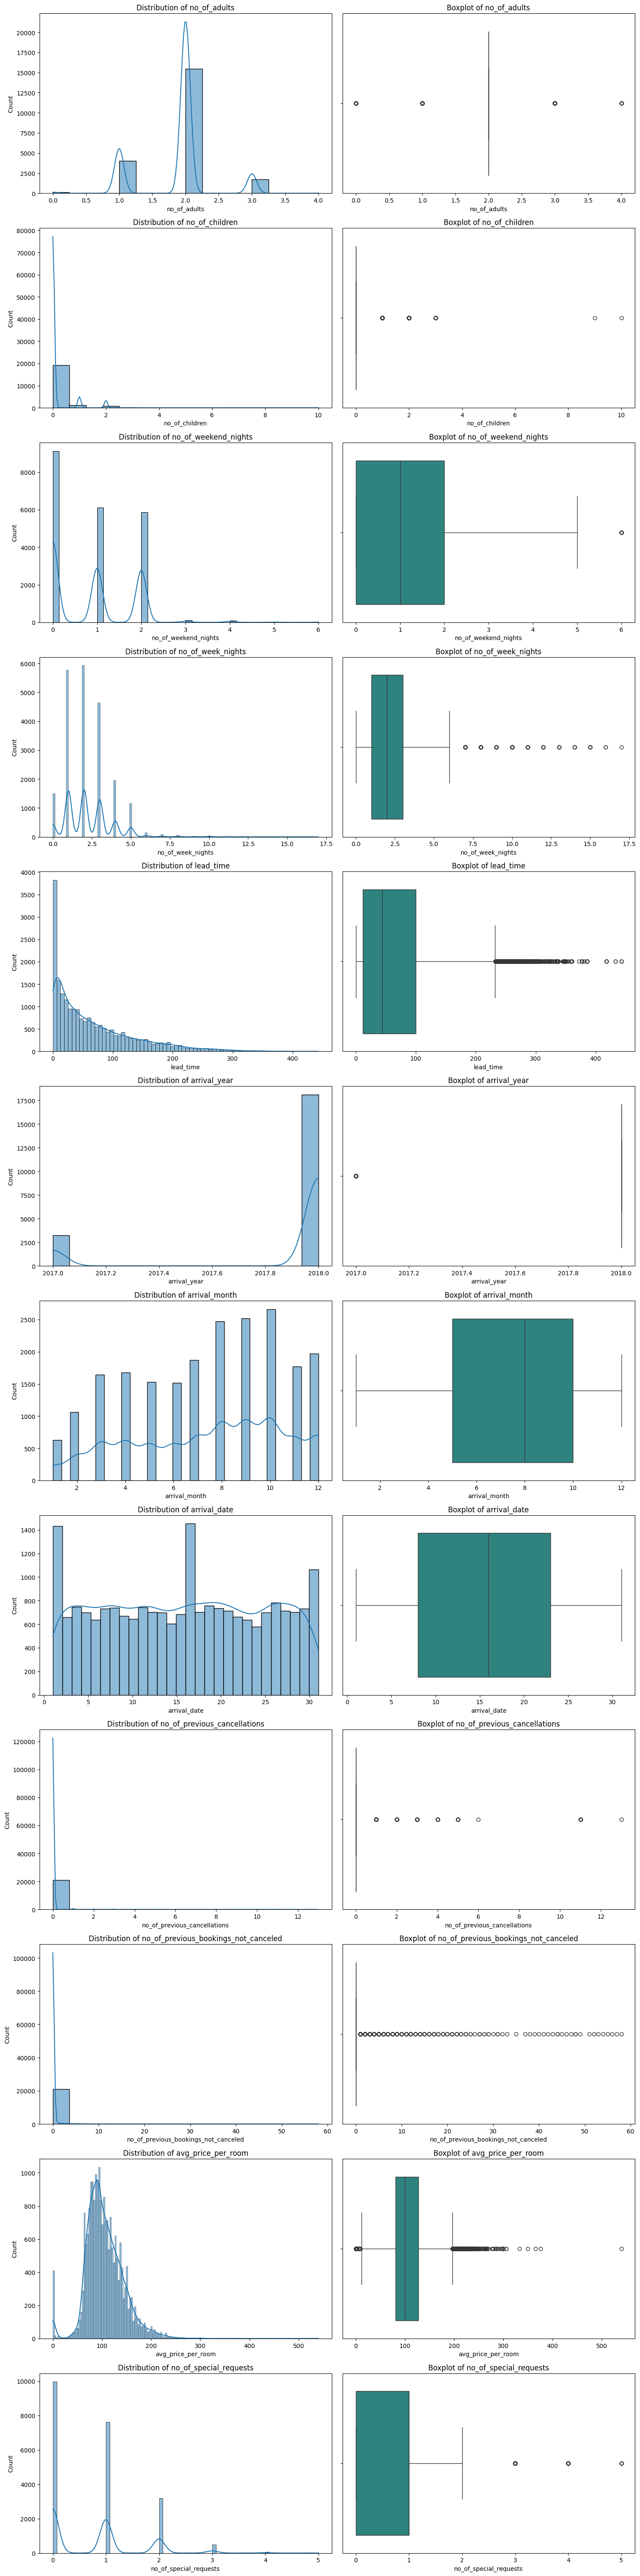

In [17]:
num_plot_dist(data, num_cols)

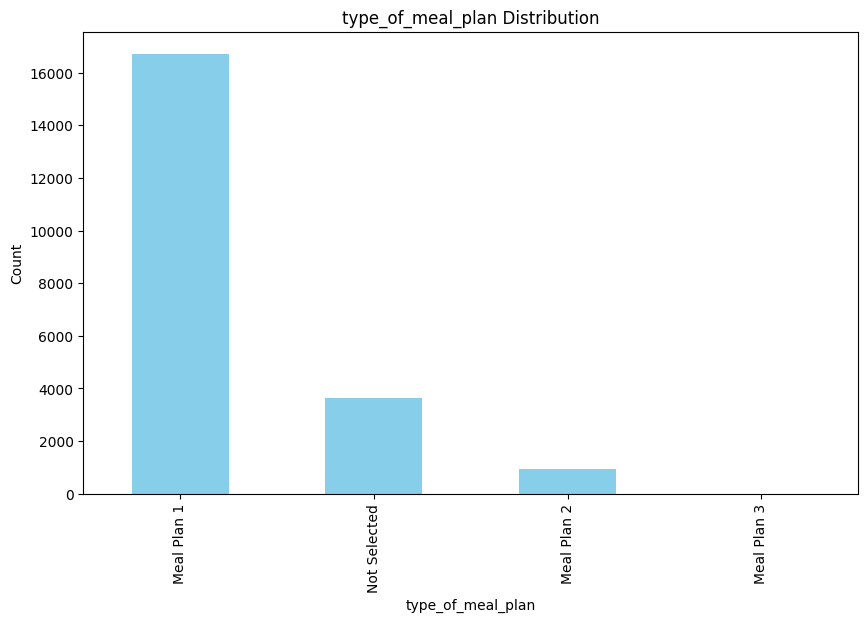

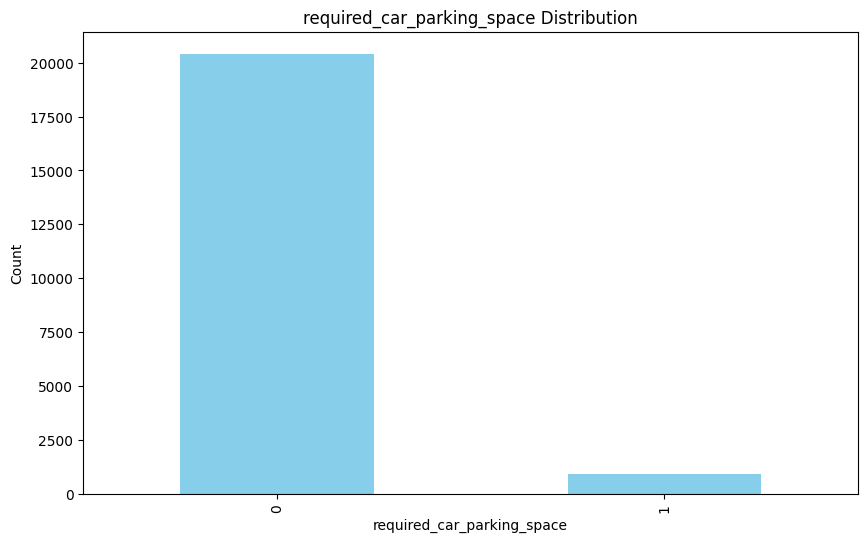

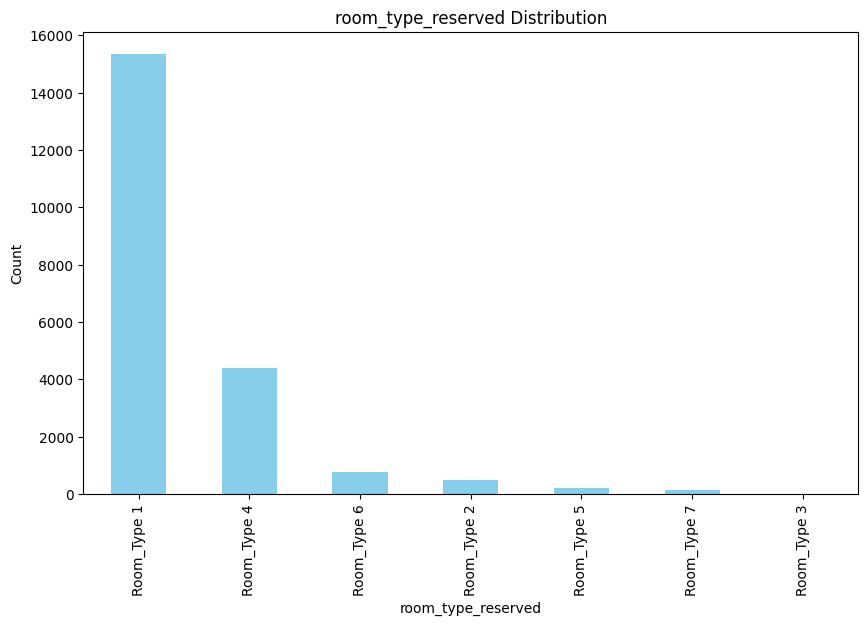

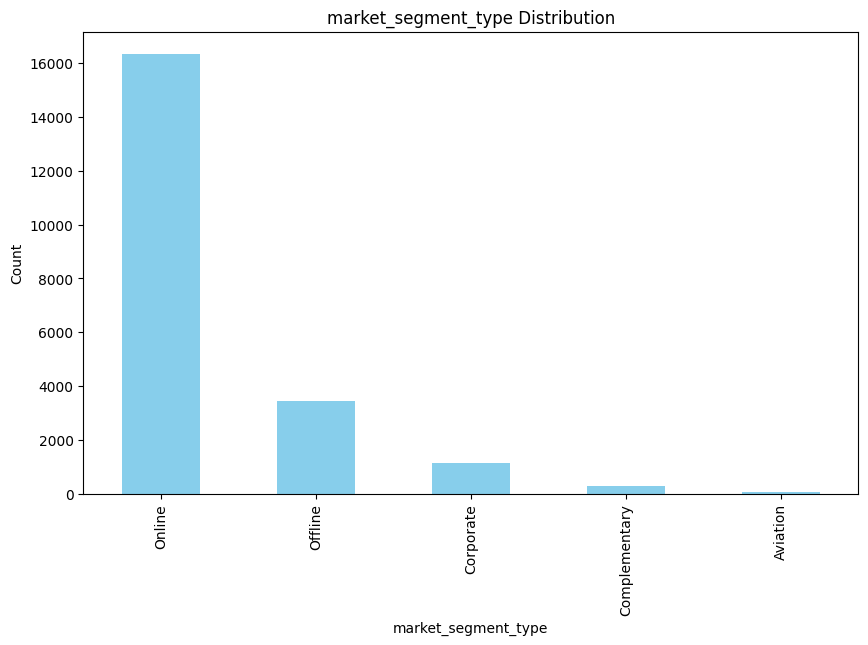

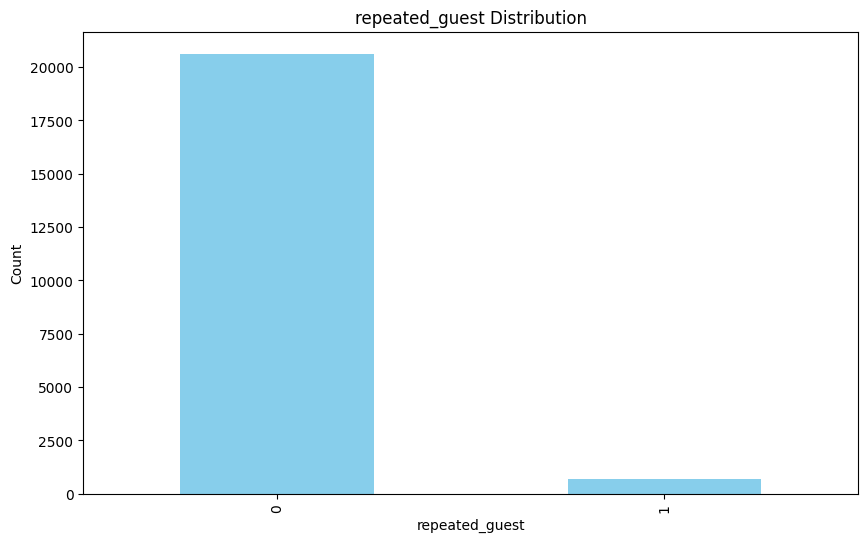

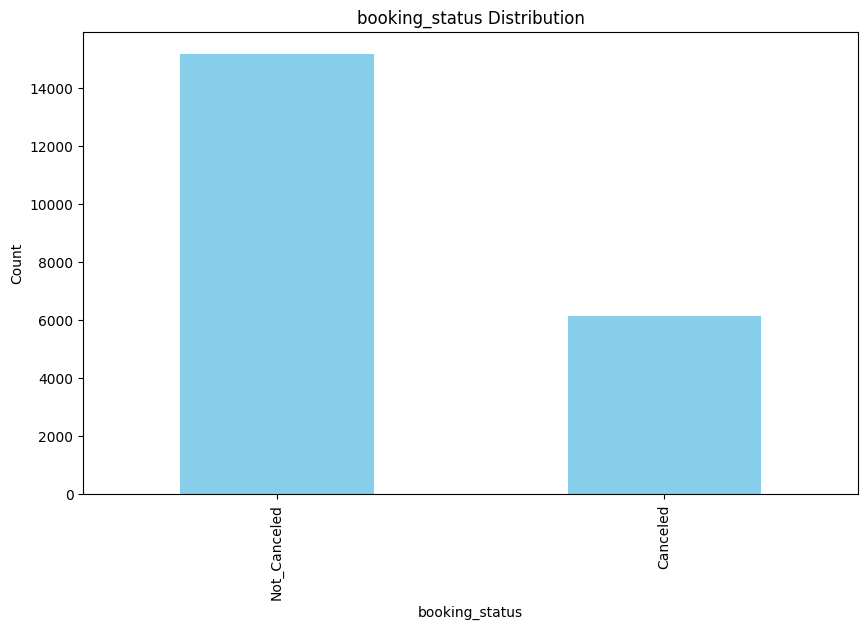

In [18]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_feature].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f"{cat_feature} Distribution")
    plt.xlabel(cat_feature)
    plt.ylabel("Count")
    plt.show()

#### Bivarite Analysis

In [19]:
def plot_bivarite_num(df, target, num_features):
    num_plots = len(num_features)
    num_rows = (num_plots + 1) // 2

    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))
    axes = axes.flatten()

    for i, column in enumerate(num_features): 
        sns.boxplot(x=target, y=column, data=df, ax=axes[i], palette="viridis")
        axes[i].set_title(f"{column} vs {target}")
    
    plt.tight_layout()
    plt.show()  
    

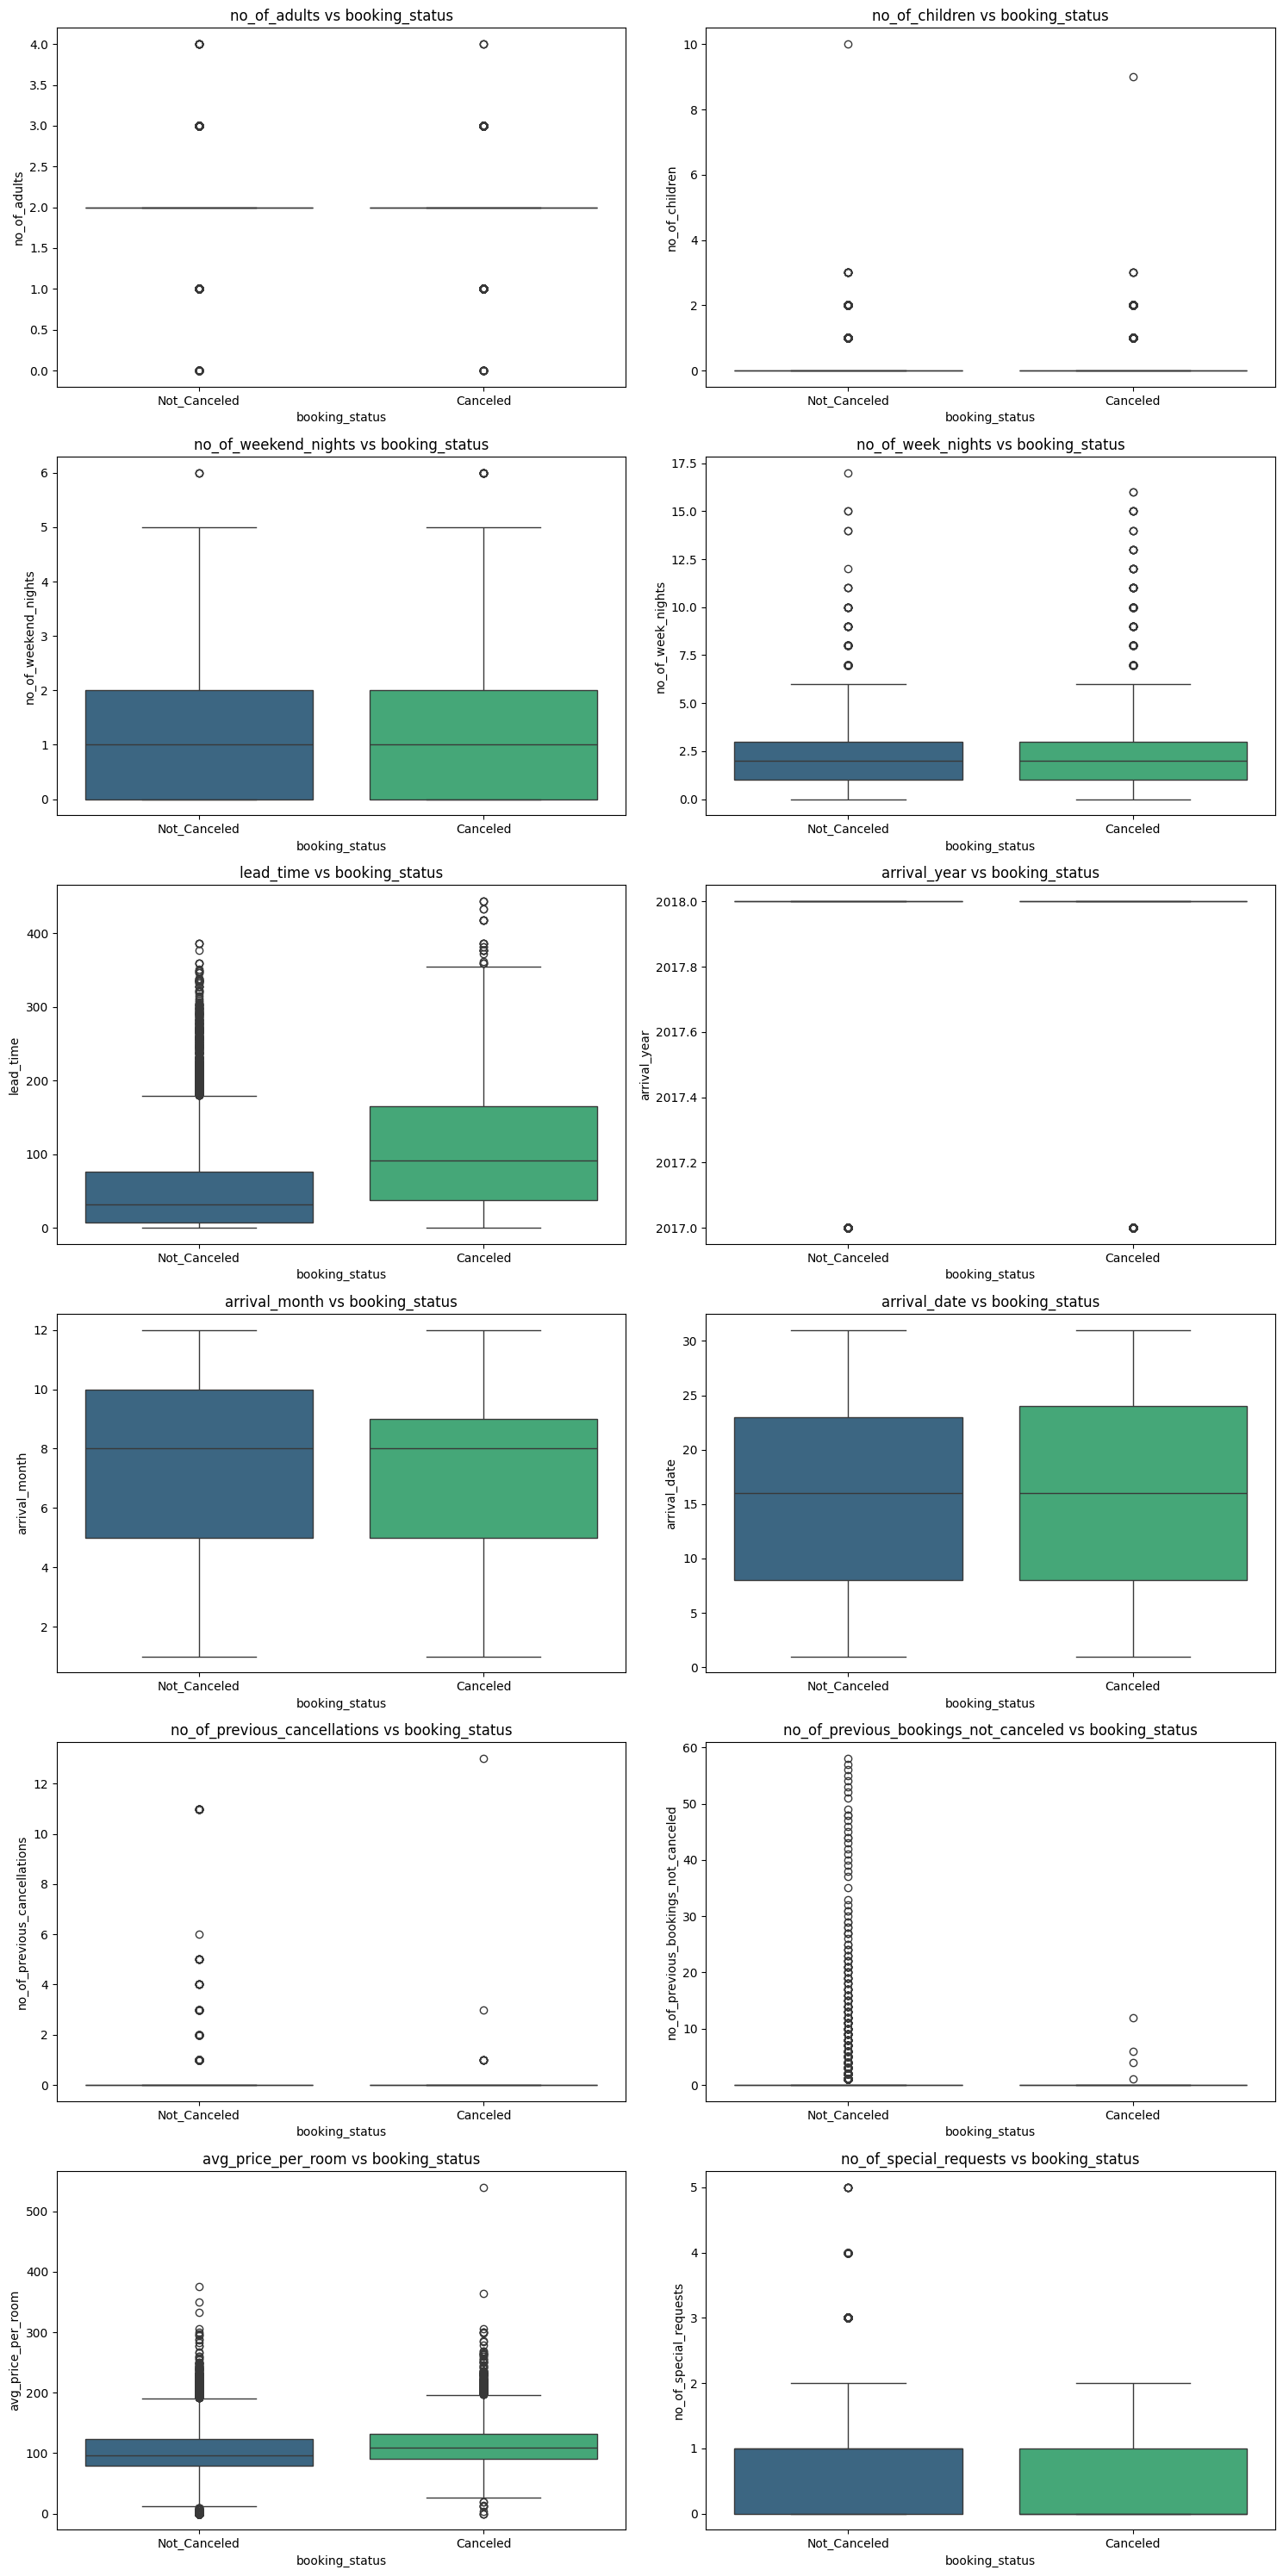

In [20]:
plot_bivarite_num(data, 'booking_status', num_cols)

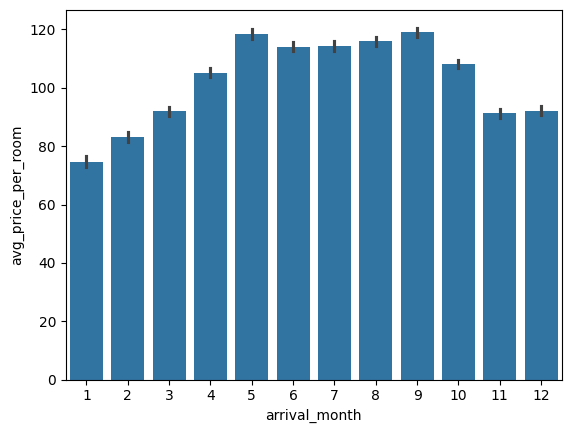

In [26]:
sns.barplot(x='arrival_month', y='avg_price_per_room', data=data)
plt.show()

In [28]:
def plot_bivaraite_cat(df, target, cat_features):
    num_features = len(cat_features)
    num_rows = (num_features + 1)//2
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, num_rows*5))
    axes = axes.flatten()

    for i, feature in enumerate(cat_features):
        sns.countplot(data=df, x=feature, hue=target, palette="viridis", ax=axes[i])
        axes[i].set_title(f"{feature} vs {target}")
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel("Count")
        axes[i].tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

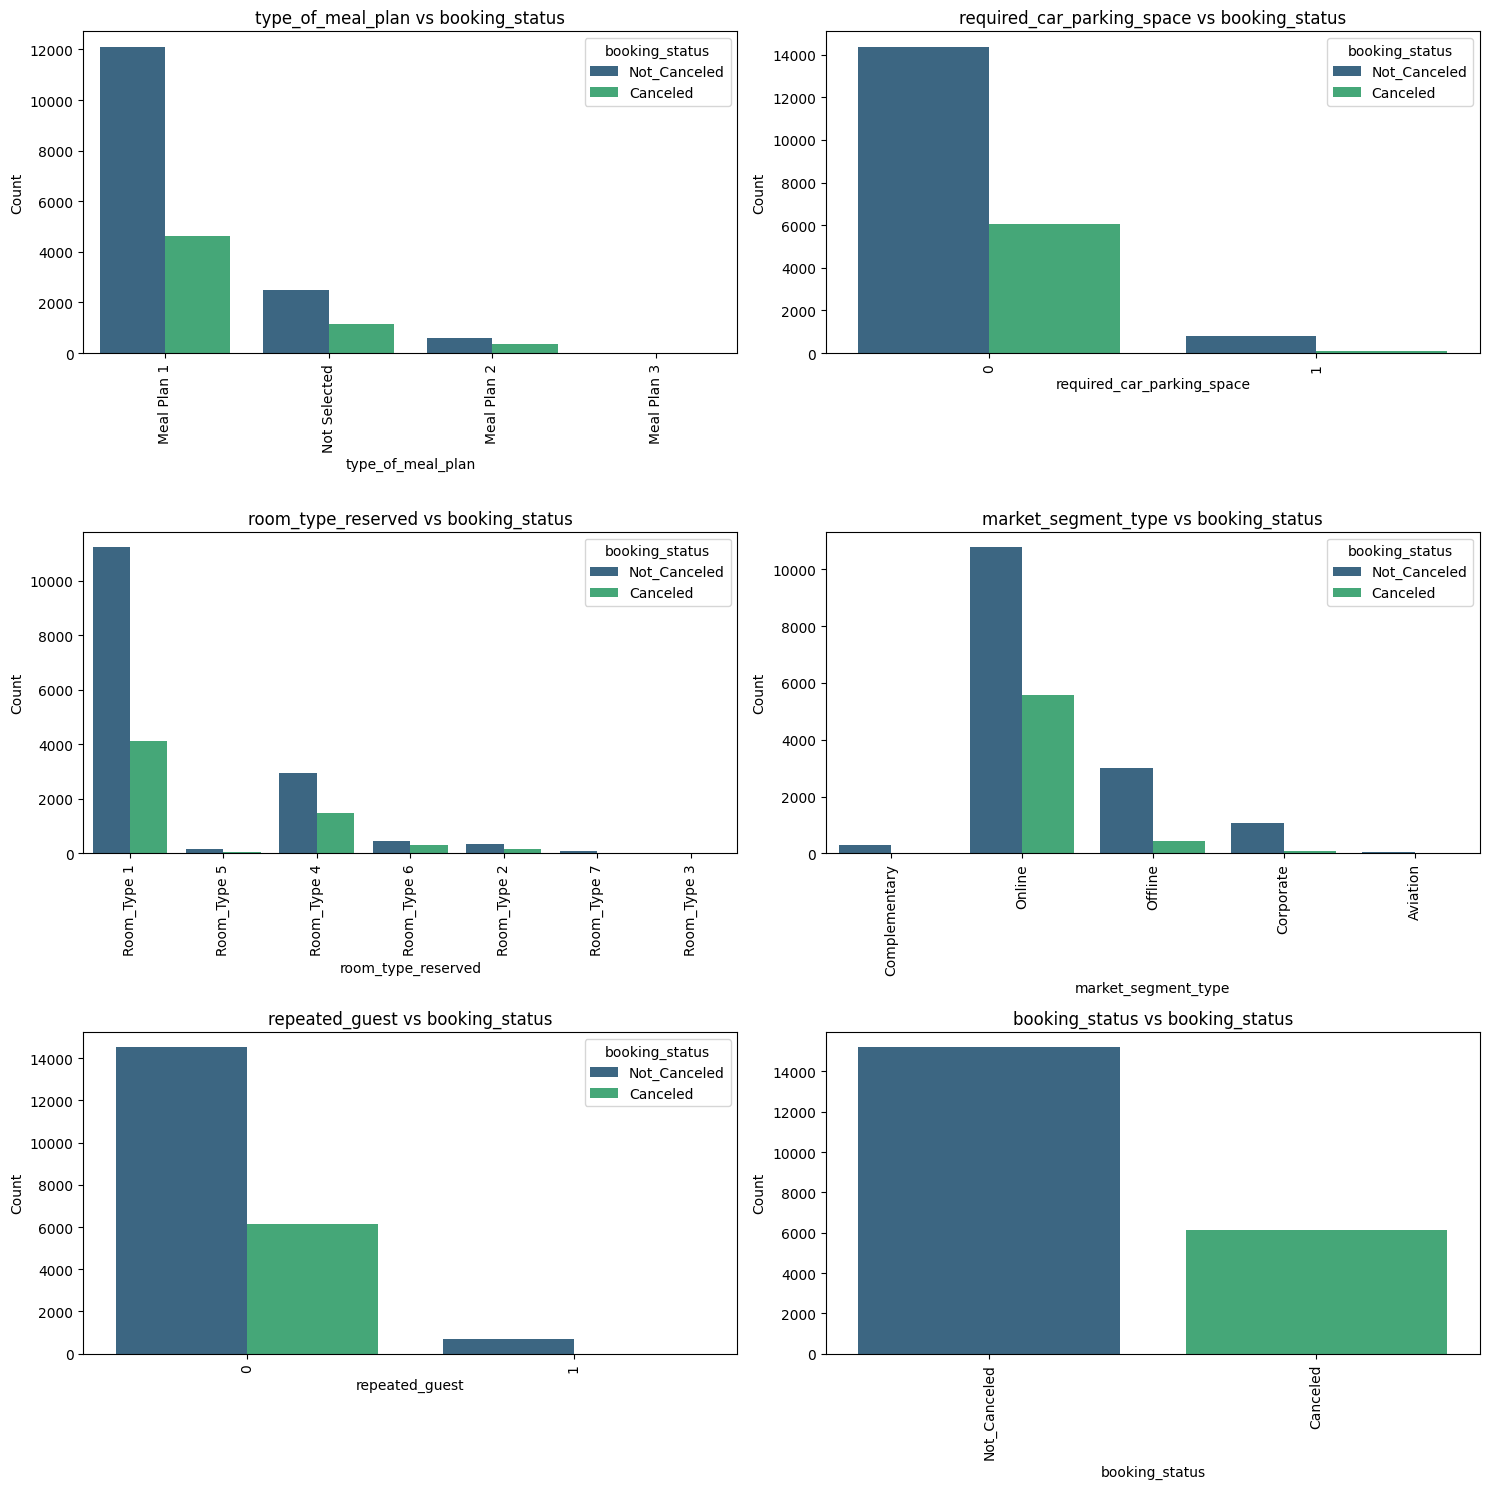

In [29]:
plot_bivaraite_cat(data, 'booking_status', cat_cols)

#### DATA PROCESSING

In [30]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1,0,0,1,Meal Plan 1,0,Room_Type 1,0,2017,9,17,Complementary,0,0,0,0.0,0,Not_Canceled
1,1,0,1,0,Not Selected,0,Room_Type 5,3,2018,9,26,Online,0,0,0,195.0,0,Not_Canceled
2,1,0,1,1,Meal Plan 1,0,Room_Type 1,0,2018,1,2,Online,0,0,0,86.0,0,Not_Canceled
3,2,0,1,2,Meal Plan 1,0,Room_Type 1,5,2017,10,19,Offline,0,0,0,90.0,0,Not_Canceled
4,2,0,2,5,Meal Plan 1,0,Room_Type 1,247,2018,9,26,Online,0,0,0,100.3,1,Canceled


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21325 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21325 non-null  int64  
 1   no_of_children                        21325 non-null  int64  
 2   no_of_weekend_nights                  21325 non-null  int64  
 3   no_of_week_nights                     21325 non-null  int64  
 4   type_of_meal_plan                     21325 non-null  object 
 5   required_car_parking_space            21325 non-null  int64  
 6   room_type_reserved                    21325 non-null  object 
 7   lead_time                             21325 non-null  int64  
 8   arrival_year                          21325 non-null  int64  
 9   arrival_month                         21325 non-null  int64  
 10  arrival_date                          21325 non-null  int64  
 11  market_segment_type 

##### Label Encoding

In [32]:
from sklearn.preprocessing import LabelEncoder

In [34]:
label_encoder = LabelEncoder()

mappings = {}

for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
    mappings[col] = {label:code for label, code in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))}

In [35]:
print(mappings)

{'type_of_meal_plan': {np.int64(0): np.int64(0), np.int64(1): np.int64(1), np.int64(2): np.int64(2), np.int64(3): np.int64(3)}, 'required_car_parking_space': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}, 'room_type_reserved': {'Room_Type 1': np.int64(0), 'Room_Type 2': np.int64(1), 'Room_Type 3': np.int64(2), 'Room_Type 4': np.int64(3), 'Room_Type 5': np.int64(4), 'Room_Type 6': np.int64(5), 'Room_Type 7': np.int64(6)}, 'market_segment_type': {'Aviation': np.int64(0), 'Complementary': np.int64(1), 'Corporate': np.int64(2), 'Offline': np.int64(3), 'Online': np.int64(4)}, 'repeated_guest': {np.int64(0): np.int64(0), np.int64(1): np.int64(1)}, 'booking_status': {'Canceled': np.int64(0), 'Not_Canceled': np.int64(1)}}


In [36]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,1,0,0,1,0,0,0,0,2017,9,17,1,0,0,0,0.0,0,1
1,1,0,1,0,3,0,4,3,2018,9,26,4,0,0,0,195.0,0,1
2,1,0,1,1,0,0,0,0,2018,1,2,4,0,0,0,86.0,0,1
3,2,0,1,2,0,0,0,5,2017,10,19,3,0,0,0,90.0,0,1
4,2,0,2,5,0,0,0,247,2018,9,26,4,0,0,0,100.3,1,0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21325 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21325 non-null  int64  
 1   no_of_children                        21325 non-null  int64  
 2   no_of_weekend_nights                  21325 non-null  int64  
 3   no_of_week_nights                     21325 non-null  int64  
 4   type_of_meal_plan                     21325 non-null  int64  
 5   required_car_parking_space            21325 non-null  int64  
 6   room_type_reserved                    21325 non-null  int64  
 7   lead_time                             21325 non-null  int64  
 8   arrival_year                          21325 non-null  int64  
 9   arrival_month                         21325 non-null  int64  
 10  arrival_date                          21325 non-null  int64  
 11  market_segment_type 

### Multicollinearity

In [ ]:
#!pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 305.2 kB/s eta 0:00:31
   -- ------------------------------------- 0.5/9.8 MB 305.2 kB/s eta 0:00:31
   -- ------------------------------------- 0.5/9.8 MB 305.2 kB/s eta 0:00:31
   -- ------------------------------------- 0.5/9.8 MB 305.2 kB/s eta 0:00:31
   --- ------------------------------------ 0.8/9.8 MB 310.8 kB/s eta 0:00:30
   --- ------------------------------------ 0.8/9.8 MB 310.8 kB/s eta 0:00:30
   ---- ----------------------------------- 1.0/9.8 MB 344.8 kB/s eta 0:00:26
   ----- -------------------------------